# Boreholes data analysis  

Data analysis of the borehole located in Australia. The measurement was taken in 1964

In [19]:
import pandas as pd
%matplotlib inline
data1 = pd.read_csv('DataB/data1964.csv')
#data1

In [20]:
del data1['Unnamed: 2']
data1.rename(columns = {'\ttemp':'temp'}, inplace=True)

Testing the correlation between the depth with the temperature. There is an high correlation 

In [21]:
data1['depth_m'].corr(data1.temp)

0.9993711539984198

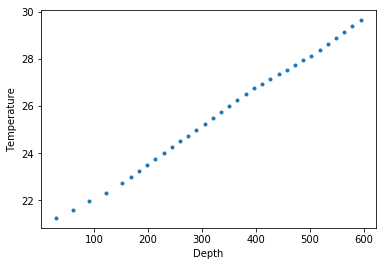

In [22]:
import matplotlib.pyplot as plt
Dlistx1 = data1.depth_m.tolist()
Dlisty1 = data1.temp.tolist()
plt.plot(Dlistx1, Dlisty1, '.');
plt.ylabel('Temperature');
plt.xlabel('Depth');

The graph shows a strong linear correlation. Therefore, it can be modelled with linear regression to calculate the geothermal gradient.

[ 0.01526204]


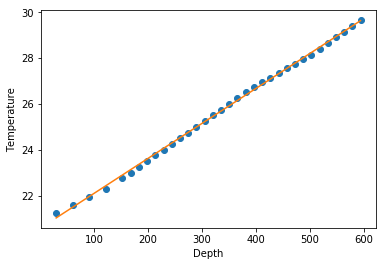

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression(normalize=True)

x1 = np.asarray(Dlistx1)

X1=x[:, np.newaxis]
model.fit(X,Dlisty1)
y_fit = model.predict(X1)
plt.plot(Dlistx1, Dlisty1, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Temperature');
plt.xlabel('Depth');
print(model.coef_)

We can test the accuracy of the model but we predict a very high accuracy. 

In [24]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Dlisty1, test_size=0.2, random_state=4);
model =LinearRegression(normalize=True)
model.fit(x_train, y_train)
y_fit = model.predict(x_test)

#plt.plot(X, Dlisty, 'o')
#plt.plot(x_test, y_fit);
model.score(x_test, y_test )

0.99701187328755259

We have a score of 99%

Now it is possible to apply the same model, to calculate the geothermal gradient of the australian borehole over a period of time: 1964, 1970, 1971, 1974, 1975, 1977 and 1980. 

In [25]:
import pandas as pd
%matplotlib inline
data1 = pd.read_csv('DataB/data1964.csv')#
data2 = pd.read_csv('DataB/data1970.csv')#
data3 = pd.read_csv('DataB/data1971.csv')#

data4 = pd.read_csv('DataB/data1974.csv')#
data5 = pd.read_csv('DataB/data1975.csv')#
data6 = pd.read_csv('DataB/data1977.csv')#

data7 = pd.read_csv('DataB/data1980.csv')#


In [26]:

del data2['Unnamed: 2']
del data3['Unnamed: 2']

del data4['Unnamed: 2']
del data5['Unnamed: 2']
del data6['Unnamed: 2']

del data7['Unnamed: 2']



In [27]:

data2.rename(columns = {'\ttemp':'temp'}, inplace=True)
data3.rename(columns = {'\ttemp':'temp'}, inplace=True)

data4.rename(columns = {'\ttemp':'temp'}, inplace=True)
data5.rename(columns = {'\ttemp':'temp'}, inplace=True)
data6.rename(columns = {'\ttemp':'temp'}, inplace=True)

data7.rename(columns = {'\ttemp':'temp'}, inplace=True)


In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

model = LinearRegression(normalize=True)




Dlistx2 = data2.depth_m.tolist()
Dlisty2 = data2.temp.tolist()

Dlistx3 = data3.depth_m.tolist()
Dlisty3 = data3.temp.tolist()



Dlistx4 = data4.depth_m.tolist()
Dlisty4 = data4.temp.tolist()


Dlistx5 = data5.depth_m.tolist()
Dlisty5 = data5.temp.tolist()

Dlistx6 = data6.depth_m.tolist()
Dlisty6 = data6.temp.tolist()



Dlistx7 = data7.depth_m.tolist()
Dlisty7 = data7.temp.tolist()





x2 = np.asarray(Dlistx2)
x3 = np.asarray(Dlistx3)

x4 = np.asarray(Dlistx4)
x5 = np.asarray(Dlistx5)
x6 = np.asarray(Dlistx6)

x7 = np.asarray(Dlistx7)




X2=x2[:, np.newaxis]
X3=x3[:, np.newaxis]

X4=x4[:, np.newaxis]
X5=x5[:, np.newaxis]
X6=x6[:, np.newaxis]

X7=x7[:, np.newaxis]



model.fit(X1,Dlisty1)
setdata1=model.coef_

model.fit(X2,Dlisty2)
setdata2=model.coef_

model.fit(X3,Dlisty3)
setdata3=model.coef_



model.fit(X4,Dlisty4)
setdata4=model.coef_

model.fit(X5,Dlisty5)
setdata5=model.coef_

model.fit(X6,Dlisty6)
setdata6=model.coef_



model.fit(X7,Dlisty7)
setdata7=model.coef_







In [29]:
print (setdata1, setdata2, setdata3, setdata4, setdata5, setdata6, setdata7)


[ 0.01526204] [ 0.01627011] [ 0.01956692] [ 0.0228279] [ 0.02293327] [ 0.03503116] [ 0.04383526]


These are the various gradients from 1964 to 1980. It is possible to create a table of data and see how the gradient is changing overtime.  

In [30]:
data = {
    "Year": [1964,1970,1971,1974,1975,1977,1980],
    "Gradients":[0.01526204, 0.01627011,  0.01956692, 0.0228279, 0.02293327, 0.03503116, 0.04383526]
}
dt= pd.DataFrame(data, columns = ['Year','Gradients' ])

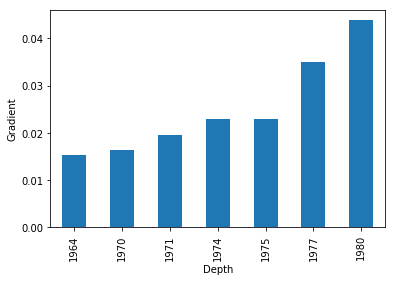

In [31]:
import matplotlib.pyplot as plt
g=dt.plot.bar(x='Year', legend=False, style=".-")
plt.ylabel('Gradient');
plt.xlabel('Depth');

The plot is showing a gradual but steady increase of the gradient over the period of time from 1964 to 1980. 